In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

In [2]:
empY = pd.read_csv('cj_empY.csv')
empY

,scd,gender,age_grp,weekday,total_qty,total_amt,event_product,amt/qty,prime_yn,ctg_0,ctg_1,ctg_2,ctg_3
0,20230101963226,1,3,0,6,39.433806,2,7.609629,0,1,0,1,0
1,20230101963235,0,4,0,2,19.234566,2,9.617283,1,1,1,0,0
2,20230101963247,1,3,0,6,45.516855,0,8.070212,1,1,1,0,1
3,20230101963251,0,3,0,2,10.845621,0,5.422811,1,0,0,0,1
4,20230101963253,1,2,0,6,47.014742,0,8.445540,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,20230131216567,0,5,1,6,27.652922,1,5.733350,1,1,0,0,0
4709,20230131216610,1,3,1,12,81.994470,6,8.342528,1,1,1,0,1
4710,20230131216674,1,4,1,4,37.317843,0,9.329461,0,0,1,0,0
4711,20230131216734,1,5,1,3,29.500314,3,9.833438,1,1,0,1,0


In [3]:
empY.set_index('scd',inplace=True)
empY

,gender,age_grp,weekday,total_qty,total_amt,event_product,amt/qty,prime_yn,ctg_0,ctg_1,ctg_2,ctg_3
scd,,,,,,,,,,,,
20230101963226,1,3,0,6,39.433806,2,7.609629,0,1,0,1,0
20230101963235,0,4,0,2,19.234566,2,9.617283,1,1,1,0,0
20230101963247,1,3,0,6,45.516855,0,8.070212,1,1,1,0,1
20230101963251,0,3,0,2,10.845621,0,5.422811,1,0,0,0,1
20230101963253,1,2,0,6,47.014742,0,8.445540,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20230131216567,0,5,1,6,27.652922,1,5.733350,1,1,0,0,0
20230131216610,1,3,1,12,81.994470,6,8.342528,1,1,1,0,1
20230131216674,1,4,1,4,37.317843,0,9.329461,0,0,1,0,0


<AxesSubplot:>

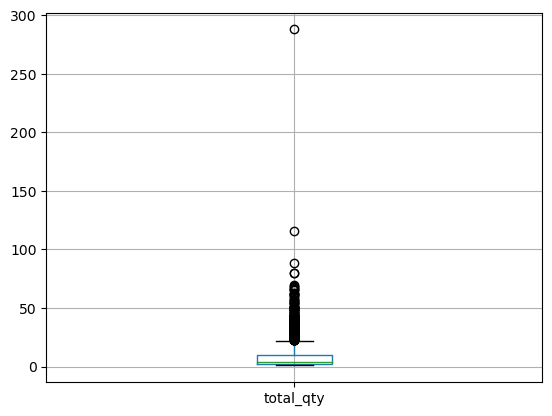

In [4]:
empY.boxplot(column='total_qty')

In [5]:
empY.boxplot(column='total_amt')

<AxesSubplot:>

In [6]:
empY.boxplot(column='amt/qty')

<AxesSubplot:>

#### xgBoost

In [20]:
# X, y 나누기
X = empY[['gender','age_grp','total_qty', 'total_amt', 'weekday',
          'event_product', 'amt/qty', 'ctg_0','ctg_1', 'ctg_2', 'ctg_3']]
y = empY['prime_yn']

In [21]:
# train, valid 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(3534, 11) (1179, 11) (3534,) (1179,)


In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

xgb_model = XGBClassifier(n_estimators=1000)

# 후보 파라미터 선정
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_valid, y_valid)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

[0]	validation_0-auc:0.56098
[1]	validation_0-auc:0.58770
[2]	validation_0-auc:0.59386
[3]	validation_0-auc:0.62978
[4]	validation_0-auc:0.63110
[5]	validation_0-auc:0.62912
[6]	validation_0-auc:0.62808
[7]	validation_0-auc:0.62083
[8]	validation_0-auc:0.62457
[9]	validation_0-auc:0.63472
[10]	validation_0-auc:0.63430
[11]	validation_0-auc:0.64789
[12]	validation_0-auc:0.64874
[13]	validation_0-auc:0.64918
[14]	validation_0-auc:0.64847
[15]	validation_0-auc:0.65210
[16]	validation_0-auc:0.65279
[17]	validation_0-auc:0.65779
[18]	validation_0-auc:0.65670
[19]	validation_0-auc:0.65518
[20]	validation_0-auc:0.65272
[21]	validation_0-auc:0.64398
[22]	validation_0-auc:0.64389
[23]	validation_0-auc:0.64259
[24]	validation_0-auc:0.64107
[25]	validation_0-auc:0.63972
[26]	validation_0-auc:0.64050
[27]	validation_0-auc:0.64340
[28]	validation_0-auc:0.64468
[29]	validation_0-auc:0.64708
[30]	validation_0-auc:0.64689
[31]	validation_0-auc:0.64898
[32]	validation_0-auc:0.64755
[33]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[14]	validation_0-auc:0.62386
[15]	validation_0-auc:0.62564
[16]	validation_0-auc:0.62490
[17]	validation_0-auc:0.62161
[18]	validation_0-auc:0.62359
[19]	validation_0-auc:0.62607
[20]	validation_0-auc:0.62678
[21]	validation_0-auc:0.63061
[22]	validation_0-auc:0.62892
[23]	validation_0-auc:0.62741
[24]	validation_0-auc:0.63059
[25]	validation_0-auc:0.62872
[26]	validation_0-auc:0.63068
[27]	validation_0-auc:0.63045
[28]	validation_0-auc:0.63048
[29]	validation_0-auc:0.63274
[30]	validation_0-auc:0.63206
[31]	validation_0-auc:0.63305
[32]	validation_0-auc:0.63157
[33]	validation_0-auc:0.63095
[34]	validation_0-auc:0.63371
[35]	validation_0-auc:0.63299
[36]	validation_0-auc:0.63346
[37]	validation_0-auc:0.63460
[38]	validation_0-auc:0.63487
[39]	validation_0-auc:0.63410
[40]	validation_0-auc:0.63495
[41]	validation_0-auc:0.63449
[42]	validation_0-auc:0.63387
[43]	validation_0-auc:0.63319
[44]	validation_0-auc:0.63316
[45]	validation_0-auc:0.63373
[46]	validation_0-auc:0.63371
[47]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-auc:0.65252
[56]	validation_0-auc:0.65222
[57]	validation_0-auc:0.65138
[58]	validation_0-auc:0.65317
[59]	validation_0-auc:0.65323
[60]	validation_0-auc:0.65085
[61]	validation_0-auc:0.65140
[62]	validation_0-auc:0.65163
[63]	validation_0-auc:0.65088
[64]	validation_0-auc:0.64856
[65]	validation_0-auc:0.64881
[66]	validation_0-auc:0.64867
[67]	validation_0-auc:0.64989
[68]	validation_0-auc:0.64988
[69]	validation_0-auc:0.64890
[70]	validation_0-auc:0.64688
[71]	validation_0-auc:0.64785
[72]	validation_0-auc:0.64772
[73]	validation_0-auc:0.64873
[0]	validation_0-auc:0.54434
[1]	validation_0-auc:0.56895
[2]	validation_0-auc:0.57110
[3]	validation_0-auc:0.61882
[4]	validation_0-auc:0.62942
[5]	validation_0-auc:0.62892
[6]	validation_0-auc:0.62984
[7]	validation_0-auc:0.63358
[8]	validation_0-auc:0.63671
[9]	validation_0-auc:0.63105
[10]	validation_0-auc:0.62860
[11]	validation_0-auc:0.63881
[12]	validation_0-auc:0.64243
[13]	validation_0-auc:0.64431
[14]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-auc:0.65019
[58]	validation_0-auc:0.65168
[59]	validation_0-auc:0.65330
[60]	validation_0-auc:0.65229
[61]	validation_0-auc:0.65179
[62]	validation_0-auc:0.65038
[63]	validation_0-auc:0.65082
[64]	validation_0-auc:0.65127
[65]	validation_0-auc:0.64947
[66]	validation_0-auc:0.64905
[67]	validation_0-auc:0.64790
[68]	validation_0-auc:0.64962
[69]	validation_0-auc:0.64938
[70]	validation_0-auc:0.64945
[71]	validation_0-auc:0.65138
[72]	validation_0-auc:0.64965
[73]	validation_0-auc:0.65013
[74]	validation_0-auc:0.65131
[75]	validation_0-auc:0.65128
[76]	validation_0-auc:0.65063
[0]	validation_0-auc:0.56264
[1]	validation_0-auc:0.57797
[2]	validation_0-auc:0.56251
[3]	validation_0-auc:0.59113
[4]	validation_0-auc:0.59387
[5]	validation_0-auc:0.59876
[6]	validation_0-auc:0.59530
[7]	validation_0-auc:0.61138
[8]	validation_0-auc:0.60913
[9]	validation_0-auc:0.61400
[10]	validation_0-auc:0.61533
[11]	validation_0-auc:0.63160
[12]	validation_0-auc:0.63978
[13]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[3]	validation_0-auc:0.58264
[4]	validation_0-auc:0.59209
[5]	validation_0-auc:0.59849
[6]	validation_0-auc:0.60074
[7]	validation_0-auc:0.60452
[8]	validation_0-auc:0.60525
[9]	validation_0-auc:0.60550
[10]	validation_0-auc:0.60184
[11]	validation_0-auc:0.60759
[12]	validation_0-auc:0.61599
[13]	validation_0-auc:0.62469
[14]	validation_0-auc:0.62692
[15]	validation_0-auc:0.62695
[16]	validation_0-auc:0.62192
[17]	validation_0-auc:0.62685
[18]	validation_0-auc:0.62808
[19]	validation_0-auc:0.63084
[20]	validation_0-auc:0.63111
[21]	validation_0-auc:0.63301
[22]	validation_0-auc:0.63303
[23]	validation_0-auc:0.63253
[24]	validation_0-auc:0.63278
[25]	validation_0-auc:0.63202
[26]	validation_0-auc:0.63430
[27]	validation_0-auc:0.63577
[28]	validation_0-auc:0.63579
[29]	validation_0-auc:0.63954
[30]	validation_0-auc:0.63644
[31]	validation_0-auc:0.63502
[32]	validation_0-auc:0.63517
[33]	validation_0-auc:0.63231
[34]	validation_0-auc:0.63625
[35]	validation_0-auc:0.63653
[36]	validation_0

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[51]	validation_0-auc:0.65834
[52]	validation_0-auc:0.65885
[53]	validation_0-auc:0.65975
[54]	validation_0-auc:0.65773
[55]	validation_0-auc:0.65771
[56]	validation_0-auc:0.65725
[57]	validation_0-auc:0.65727
[58]	validation_0-auc:0.65988
[59]	validation_0-auc:0.66104
[60]	validation_0-auc:0.66032
[61]	validation_0-auc:0.65872
[62]	validation_0-auc:0.65958
[63]	validation_0-auc:0.65838
[64]	validation_0-auc:0.65734
[65]	validation_0-auc:0.65672
[66]	validation_0-auc:0.65563
[67]	validation_0-auc:0.65601
[68]	validation_0-auc:0.65595
[69]	validation_0-auc:0.65421
[70]	validation_0-auc:0.65461
[71]	validation_0-auc:0.65483
[72]	validation_0-auc:0.65476
[73]	validation_0-auc:0.65512
[74]	validation_0-auc:0.65642
[75]	validation_0-auc:0.65622
[76]	validation_0-auc:0.65529
[77]	validation_0-auc:0.65570
[78]	validation_0-auc:0.65582
[79]	validation_0-auc:0.65570
[80]	validation_0-auc:0.65558
[81]	validation_0-auc:0.65579
[82]	validation_0-auc:0.65546
[83]	validation_0-auc:0.65568
[84]	vali

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-auc:0.63818
[50]	validation_0-auc:0.63645
[51]	validation_0-auc:0.63590
[52]	validation_0-auc:0.63674
[53]	validation_0-auc:0.63645
[54]	validation_0-auc:0.63721
[55]	validation_0-auc:0.63873
[56]	validation_0-auc:0.63973
[57]	validation_0-auc:0.63991
[58]	validation_0-auc:0.63920
[59]	validation_0-auc:0.63878
[60]	validation_0-auc:0.63631
[61]	validation_0-auc:0.63571
[62]	validation_0-auc:0.63451
[63]	validation_0-auc:0.63453
[64]	validation_0-auc:0.63762
[65]	validation_0-auc:0.63793
[66]	validation_0-auc:0.63821
[67]	validation_0-auc:0.63754
[68]	validation_0-auc:0.63864
[69]	validation_0-auc:0.63847
[70]	validation_0-auc:0.63838
[71]	validation_0-auc:0.63758
[72]	validation_0-auc:0.63769
[73]	validation_0-auc:0.63737
[74]	validation_0-auc:0.63821
[75]	validation_0-auc:0.63846
[76]	validation_0-auc:0.63945
[77]	validation_0-auc:0.64032
[78]	validation_0-auc:0.63984
[79]	validation_0-auc:0.64101
[80]	validation_0-auc:0.64120
[81]	validation_0-auc:0.64112
[82]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-auc:0.64253
[46]	validation_0-auc:0.64302
[47]	validation_0-auc:0.64526
[48]	validation_0-auc:0.64662
[49]	validation_0-auc:0.64730
[50]	validation_0-auc:0.64856
[51]	validation_0-auc:0.64882
[52]	validation_0-auc:0.64575
[53]	validation_0-auc:0.64834
[54]	validation_0-auc:0.64796
[55]	validation_0-auc:0.64999
[56]	validation_0-auc:0.65036
[57]	validation_0-auc:0.65065
[58]	validation_0-auc:0.64970
[59]	validation_0-auc:0.64962
[60]	validation_0-auc:0.64990
[61]	validation_0-auc:0.64717
[62]	validation_0-auc:0.64682
[63]	validation_0-auc:0.64633
[64]	validation_0-auc:0.64670
[65]	validation_0-auc:0.64642
[66]	validation_0-auc:0.64607
[67]	validation_0-auc:0.64699
[68]	validation_0-auc:0.64620
[69]	validation_0-auc:0.64598
[70]	validation_0-auc:0.64572
[71]	validation_0-auc:0.64588
[72]	validation_0-auc:0.64592
[73]	validation_0-auc:0.64534
[74]	validation_0-auc:0.64560
[75]	validation_0-auc:0.64572
[76]	validation_0-auc:0.64555
[77]	validation_0-auc:0.64494
[78]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-auc:0.63037
[49]	validation_0-auc:0.63141
[50]	validation_0-auc:0.63050
[51]	validation_0-auc:0.62905
[52]	validation_0-auc:0.62935
[53]	validation_0-auc:0.62995
[54]	validation_0-auc:0.63049
[55]	validation_0-auc:0.63023
[56]	validation_0-auc:0.63022
[57]	validation_0-auc:0.62976
[58]	validation_0-auc:0.63151
[59]	validation_0-auc:0.63059
[60]	validation_0-auc:0.63140
[61]	validation_0-auc:0.62975
[62]	validation_0-auc:0.62988
[63]	validation_0-auc:0.63013
[64]	validation_0-auc:0.63380
[65]	validation_0-auc:0.63355
[66]	validation_0-auc:0.63357
[67]	validation_0-auc:0.63417
[68]	validation_0-auc:0.63446
[69]	validation_0-auc:0.63228
[70]	validation_0-auc:0.63343
[71]	validation_0-auc:0.63383
[72]	validation_0-auc:0.63226
[73]	validation_0-auc:0.63039
[74]	validation_0-auc:0.63062
[75]	validation_0-auc:0.63096
[76]	validation_0-auc:0.63058
[77]	validation_0-auc:0.63056
[78]	validation_0-auc:0.62980
[79]	validation_0-auc:0.63031
[80]	validation_0-auc:0.63169
[81]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-auc:0.61946
[46]	validation_0-auc:0.62006
[0]	validation_0-auc:0.52515
[1]	validation_0-auc:0.55833
[2]	validation_0-auc:0.55830
[3]	validation_0-auc:0.59305
[4]	validation_0-auc:0.61190
[5]	validation_0-auc:0.61520
[6]	validation_0-auc:0.62002
[7]	validation_0-auc:0.62707
[8]	validation_0-auc:0.62470
[9]	validation_0-auc:0.62268
[10]	validation_0-auc:0.61662
[11]	validation_0-auc:0.61928
[12]	validation_0-auc:0.61784
[13]	validation_0-auc:0.62106
[14]	validation_0-auc:0.62236
[15]	validation_0-auc:0.62928
[16]	validation_0-auc:0.63146
[17]	validation_0-auc:0.63041
[18]	validation_0-auc:0.62959
[19]	validation_0-auc:0.63113
[20]	validation_0-auc:0.63323
[21]	validation_0-auc:0.63179
[22]	validation_0-auc:0.62999
[23]	validation_0-auc:0.63422
[24]	validation_0-auc:0.63330
[25]	validation_0-auc:0.63499
[26]	validation_0-auc:0.63378
[27]	validation_0-auc:0.63261
[28]	validation_0-auc:0.63391
[29]	validation_0-auc:0.63129
[30]	validation_0-auc:0.63049
[31]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-auc:0.63158
[46]	validation_0-auc:0.63292
[47]	validation_0-auc:0.63353
[48]	validation_0-auc:0.63238
[49]	validation_0-auc:0.63381
[50]	validation_0-auc:0.63326
[51]	validation_0-auc:0.63258
[52]	validation_0-auc:0.63380
[53]	validation_0-auc:0.63423
[54]	validation_0-auc:0.63386
[55]	validation_0-auc:0.63546
[56]	validation_0-auc:0.63522
[57]	validation_0-auc:0.63509
[58]	validation_0-auc:0.63434
[59]	validation_0-auc:0.63404
[60]	validation_0-auc:0.63334
[61]	validation_0-auc:0.63324
[62]	validation_0-auc:0.63324
[63]	validation_0-auc:0.63366
[64]	validation_0-auc:0.63327
[65]	validation_0-auc:0.63343
[66]	validation_0-auc:0.63395
[67]	validation_0-auc:0.63488
[68]	validation_0-auc:0.63478
[69]	validation_0-auc:0.63405
[70]	validation_0-auc:0.63382
[71]	validation_0-auc:0.63418
[72]	validation_0-auc:0.63420
[73]	validation_0-auc:0.63228
[74]	validation_0-auc:0.63178
[75]	validation_0-auc:0.63199
[76]	validation_0-auc:0.63199
[77]	validation_0-auc:0.63098
[78]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[3]	validation_0-auc:0.60404
[4]	validation_0-auc:0.60547
[5]	validation_0-auc:0.62463
[6]	validation_0-auc:0.62897
[7]	validation_0-auc:0.62386
[8]	validation_0-auc:0.62507
[9]	validation_0-auc:0.62518
[10]	validation_0-auc:0.62614
[11]	validation_0-auc:0.62695
[12]	validation_0-auc:0.62981
[13]	validation_0-auc:0.63059
[14]	validation_0-auc:0.62753
[15]	validation_0-auc:0.62566
[16]	validation_0-auc:0.62361
[17]	validation_0-auc:0.62294
[18]	validation_0-auc:0.62481
[19]	validation_0-auc:0.62373
[20]	validation_0-auc:0.62573
[21]	validation_0-auc:0.62835
[22]	validation_0-auc:0.63247
[23]	validation_0-auc:0.63282
[24]	validation_0-auc:0.63201
[25]	validation_0-auc:0.63097
[26]	validation_0-auc:0.63107
[27]	validation_0-auc:0.63294
[28]	validation_0-auc:0.63476
[29]	validation_0-auc:0.63213
[30]	validation_0-auc:0.63161
[31]	validation_0-auc:0.62925
[32]	validation_0-auc:0.63479
[33]	validation_0-auc:0.63286
[34]	validation_0-auc:0.63565
[35]	validation_0-auc:0.63560
[36]	validation_0

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-auc:0.65925
[51]	validation_0-auc:0.65945
[52]	validation_0-auc:0.65959
[53]	validation_0-auc:0.65845
[54]	validation_0-auc:0.65792
[55]	validation_0-auc:0.65593
[56]	validation_0-auc:0.65583
[57]	validation_0-auc:0.65542
[58]	validation_0-auc:0.65574
[59]	validation_0-auc:0.65644
[60]	validation_0-auc:0.65591
[61]	validation_0-auc:0.65417
[62]	validation_0-auc:0.65275
[63]	validation_0-auc:0.65385
[64]	validation_0-auc:0.65427
[65]	validation_0-auc:0.65409
[66]	validation_0-auc:0.65519
[67]	validation_0-auc:0.65512
[68]	validation_0-auc:0.65428
[69]	validation_0-auc:0.65398
[70]	validation_0-auc:0.65347
[71]	validation_0-auc:0.65310
[72]	validation_0-auc:0.65332
[73]	validation_0-auc:0.65208
[74]	validation_0-auc:0.65342
[0]	validation_0-auc:0.54129
[1]	validation_0-auc:0.56618
[2]	validation_0-auc:0.58718
[3]	validation_0-auc:0.61096
[4]	validation_0-auc:0.61536
[5]	validation_0-auc:0.62409
[6]	validation_0-auc:0.63351
[7]	validation_0-auc:0.63246
[8]	validation_0-a

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-auc:0.65228
[51]	validation_0-auc:0.65191
[52]	validation_0-auc:0.65056
[53]	validation_0-auc:0.64864
[54]	validation_0-auc:0.64946
[55]	validation_0-auc:0.64899
[56]	validation_0-auc:0.64841
[57]	validation_0-auc:0.64715
[58]	validation_0-auc:0.64689
[59]	validation_0-auc:0.65103
[60]	validation_0-auc:0.65083
[61]	validation_0-auc:0.65035
[62]	validation_0-auc:0.65062
[63]	validation_0-auc:0.65054
[64]	validation_0-auc:0.65039
[65]	validation_0-auc:0.65008
[66]	validation_0-auc:0.65084
[67]	validation_0-auc:0.65132
[68]	validation_0-auc:0.65011
[69]	validation_0-auc:0.65004
[70]	validation_0-auc:0.64987
[71]	validation_0-auc:0.65041
[72]	validation_0-auc:0.65029
[73]	validation_0-auc:0.65114
[74]	validation_0-auc:0.65243
[75]	validation_0-auc:0.65491
[76]	validation_0-auc:0.65337
[77]	validation_0-auc:0.65352
[78]	validation_0-auc:0.65548
[79]	validation_0-auc:0.65574
[80]	validation_0-auc:0.65568
[81]	validation_0-auc:0.65545
[82]	validation_0-auc:0.65620
[83]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-auc:0.63814
[50]	validation_0-auc:0.63944
[51]	validation_0-auc:0.63954
[52]	validation_0-auc:0.64015
[53]	validation_0-auc:0.63945
[54]	validation_0-auc:0.63891
[0]	validation_0-auc:0.54751
[1]	validation_0-auc:0.55360
[2]	validation_0-auc:0.56362
[3]	validation_0-auc:0.59754
[4]	validation_0-auc:0.60800
[5]	validation_0-auc:0.61880
[6]	validation_0-auc:0.62467
[7]	validation_0-auc:0.62156
[8]	validation_0-auc:0.62480
[9]	validation_0-auc:0.62671
[10]	validation_0-auc:0.62848
[11]	validation_0-auc:0.63424
[12]	validation_0-auc:0.63703
[13]	validation_0-auc:0.63821
[14]	validation_0-auc:0.63883
[15]	validation_0-auc:0.64112
[16]	validation_0-auc:0.63788
[17]	validation_0-auc:0.63584
[18]	validation_0-auc:0.63615
[19]	validation_0-auc:0.63620
[20]	validation_0-auc:0.63485
[21]	validation_0-auc:0.63431
[22]	validation_0-auc:0.63528
[23]	validation_0-auc:0.63235
[24]	validation_0-auc:0.63381
[25]	validation_0-auc:0.63488
[26]	validation_0-auc:0.63614
[27]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[1]	validation_0-auc:0.54403
[2]	validation_0-auc:0.55747
[3]	validation_0-auc:0.59548
[4]	validation_0-auc:0.59579
[5]	validation_0-auc:0.60575
[6]	validation_0-auc:0.61199
[7]	validation_0-auc:0.61261
[8]	validation_0-auc:0.61598
[9]	validation_0-auc:0.62865
[10]	validation_0-auc:0.63049
[11]	validation_0-auc:0.63119
[12]	validation_0-auc:0.62941
[13]	validation_0-auc:0.63170
[14]	validation_0-auc:0.63054
[15]	validation_0-auc:0.63216
[16]	validation_0-auc:0.63387
[17]	validation_0-auc:0.63879
[18]	validation_0-auc:0.63585
[19]	validation_0-auc:0.63609
[20]	validation_0-auc:0.63077
[21]	validation_0-auc:0.63264
[22]	validation_0-auc:0.62884
[23]	validation_0-auc:0.62980
[24]	validation_0-auc:0.62740
[25]	validation_0-auc:0.62748
[26]	validation_0-auc:0.63225
[27]	validation_0-auc:0.63308
[28]	validation_0-auc:0.63164
[29]	validation_0-auc:0.63261
[30]	validation_0-auc:0.63180
[31]	validation_0-auc:0.63344
[32]	validation_0-auc:0.63509
[33]	validation_0-auc:0.63618
[34]	validation_0-a

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-auc:0.63744
[45]	validation_0-auc:0.63968
[46]	validation_0-auc:0.64159
[47]	validation_0-auc:0.64037
[48]	validation_0-auc:0.64058
[49]	validation_0-auc:0.64047
[50]	validation_0-auc:0.64274
[51]	validation_0-auc:0.64259
[52]	validation_0-auc:0.64296
[53]	validation_0-auc:0.64211
[54]	validation_0-auc:0.64094
[55]	validation_0-auc:0.64001
[56]	validation_0-auc:0.63990
[57]	validation_0-auc:0.63939
[58]	validation_0-auc:0.63907
[59]	validation_0-auc:0.63926
[60]	validation_0-auc:0.63990
[61]	validation_0-auc:0.64023
[62]	validation_0-auc:0.64081
[63]	validation_0-auc:0.64067
[64]	validation_0-auc:0.64237
[65]	validation_0-auc:0.64364
[66]	validation_0-auc:0.64408
[67]	validation_0-auc:0.64299
[68]	validation_0-auc:0.64321
[69]	validation_0-auc:0.64226
[70]	validation_0-auc:0.64258
[71]	validation_0-auc:0.64283
[72]	validation_0-auc:0.64202
[73]	validation_0-auc:0.64218
[74]	validation_0-auc:0.64249
[75]	validation_0-auc:0.64370
[76]	validation_0-auc:0.64428
[77]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-auc:0.63692
[43]	validation_0-auc:0.63583
[44]	validation_0-auc:0.63785
[45]	validation_0-auc:0.63710
[46]	validation_0-auc:0.63744
[47]	validation_0-auc:0.64098
[48]	validation_0-auc:0.64058
[49]	validation_0-auc:0.64026
[50]	validation_0-auc:0.64148
[51]	validation_0-auc:0.64104
[52]	validation_0-auc:0.63990
[53]	validation_0-auc:0.64019
[54]	validation_0-auc:0.63998
[55]	validation_0-auc:0.64021
[56]	validation_0-auc:0.64074
[57]	validation_0-auc:0.64090
[58]	validation_0-auc:0.64189
[59]	validation_0-auc:0.64236
[60]	validation_0-auc:0.64301
[61]	validation_0-auc:0.64454
[62]	validation_0-auc:0.64477
[63]	validation_0-auc:0.64561
[64]	validation_0-auc:0.64480
[65]	validation_0-auc:0.64472
[66]	validation_0-auc:0.64328
[67]	validation_0-auc:0.64401
[68]	validation_0-auc:0.64332
[69]	validation_0-auc:0.64422
[70]	validation_0-auc:0.64185
[71]	validation_0-auc:0.64223
[72]	validation_0-auc:0.64314
[73]	validation_0-auc:0.64298
[74]	validation_0-auc:0.64280
[75]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.63426
[47]	validation_0-auc:0.63383
[48]	validation_0-auc:0.63337
[49]	validation_0-auc:0.63304
[50]	validation_0-auc:0.63310
[51]	validation_0-auc:0.63309
[52]	validation_0-auc:0.63474
[53]	validation_0-auc:0.63474
[54]	validation_0-auc:0.63532
[55]	validation_0-auc:0.63533
[56]	validation_0-auc:0.63505
[57]	validation_0-auc:0.63510
[58]	validation_0-auc:0.63558
[59]	validation_0-auc:0.63565
[60]	validation_0-auc:0.63587
[61]	validation_0-auc:0.63610
[62]	validation_0-auc:0.63633
[63]	validation_0-auc:0.63593
[64]	validation_0-auc:0.63559
[65]	validation_0-auc:0.63679
[66]	validation_0-auc:0.63724
[67]	validation_0-auc:0.63600
[68]	validation_0-auc:0.63432
[69]	validation_0-auc:0.63273
[70]	validation_0-auc:0.63220
[71]	validation_0-auc:0.63229
[72]	validation_0-auc:0.63199
[73]	validation_0-auc:0.63225
[74]	validation_0-auc:0.63181
[75]	validation_0-auc:0.63296
[76]	validation_0-auc:0.63236
[77]	validation_0-auc:0.63359
[78]	validation_0-auc:0.63583
[79]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.61976
[37]	validation_0-auc:0.61984
[38]	validation_0-auc:0.62342
[39]	validation_0-auc:0.61821
[40]	validation_0-auc:0.61818
[41]	validation_0-auc:0.61970
[42]	validation_0-auc:0.62019
[43]	validation_0-auc:0.62067
[44]	validation_0-auc:0.62059
[45]	validation_0-auc:0.61985
[46]	validation_0-auc:0.61919
[47]	validation_0-auc:0.61958
[48]	validation_0-auc:0.62086
[49]	validation_0-auc:0.62243
[50]	validation_0-auc:0.62215
[51]	validation_0-auc:0.61859
[52]	validation_0-auc:0.61887
[53]	validation_0-auc:0.61949
[54]	validation_0-auc:0.61982
[55]	validation_0-auc:0.61921
[56]	validation_0-auc:0.62020
[57]	validation_0-auc:0.62026
[58]	validation_0-auc:0.61974
[59]	validation_0-auc:0.62028
[60]	validation_0-auc:0.62034
[61]	validation_0-auc:0.62038
[0]	validation_0-auc:0.53502
[1]	validation_0-auc:0.54768
[2]	validation_0-auc:0.56286
[3]	validation_0-auc:0.58215
[4]	validation_0-auc:0.59672
[5]	validation_0-auc:0.60062
[6]	validation_0-auc:0.59311
[7]	validation_0-

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.63739
[47]	validation_0-auc:0.63610
[48]	validation_0-auc:0.63514
[49]	validation_0-auc:0.63438
[50]	validation_0-auc:0.63484
[51]	validation_0-auc:0.63548
[52]	validation_0-auc:0.63710
[53]	validation_0-auc:0.63841
[54]	validation_0-auc:0.63876
[55]	validation_0-auc:0.63958
[56]	validation_0-auc:0.63936
[57]	validation_0-auc:0.63773
[58]	validation_0-auc:0.63866
[59]	validation_0-auc:0.63883
[60]	validation_0-auc:0.63799
[61]	validation_0-auc:0.63880
[62]	validation_0-auc:0.63983
[63]	validation_0-auc:0.64086
[64]	validation_0-auc:0.64157
[65]	validation_0-auc:0.64130
[66]	validation_0-auc:0.64082
[67]	validation_0-auc:0.63993
[68]	validation_0-auc:0.63855
[69]	validation_0-auc:0.63845
[70]	validation_0-auc:0.63940
[71]	validation_0-auc:0.64041
[72]	validation_0-auc:0.64118
[73]	validation_0-auc:0.64048
[74]	validation_0-auc:0.64068
[75]	validation_0-auc:0.64011
[76]	validation_0-auc:0.63910
[77]	validation_0-auc:0.63689
[78]	validation_0-auc:0.63796
[79]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-auc:0.66109
[44]	validation_0-auc:0.66031
[45]	validation_0-auc:0.66033
[46]	validation_0-auc:0.66031
{'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}


In [50]:
# 1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=6, min_child_weight=1, colsample_bytree=0.4, reg_alpha=0.03)

In [51]:
# 학습
xgb_model.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_valid, y_valid)])

[0]	validation_0-auc:0.57410
[1]	validation_0-auc:0.59712
[2]	validation_0-auc:0.59467
[3]	validation_0-auc:0.62258
[4]	validation_0-auc:0.62277
[5]	validation_0-auc:0.62656
[6]	validation_0-auc:0.62667
[7]	validation_0-auc:0.62390
[8]	validation_0-auc:0.63182
[9]	validation_0-auc:0.63017
[10]	validation_0-auc:0.62911
[11]	validation_0-auc:0.64246
[12]	validation_0-auc:0.64959
[13]	validation_0-auc:0.64909
[14]	validation_0-auc:0.64875
[15]	validation_0-auc:0.65351
[16]	validation_0-auc:0.65386
[17]	validation_0-auc:0.65763
[18]	validation_0-auc:0.65678
[19]	validation_0-auc:0.65598
[20]	validation_0-auc:0.65376
[21]	validation_0-auc:0.65080
[22]	validation_0-auc:0.64752
[23]	validation_0-auc:0.65259
[24]	validation_0-auc:0.65204
[25]	validation_0-auc:0.65388
[26]	validation_0-auc:0.65564
[27]	validation_0-auc:0.65638
[28]	validation_0-auc:0.65510
[29]	validation_0-auc:0.65270
[30]	validation_0-auc:0.65572
[31]	validation_0-auc:0.65886
[32]	validation_0-auc:0.65745
[33]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[62]	validation_0-auc:0.66973
[63]	validation_0-auc:0.66949
[64]	validation_0-auc:0.66882
[65]	validation_0-auc:0.66924
[66]	validation_0-auc:0.66949
[67]	validation_0-auc:0.66965
[68]	validation_0-auc:0.67004
[69]	validation_0-auc:0.66993
[70]	validation_0-auc:0.67006
[71]	validation_0-auc:0.66936
[72]	validation_0-auc:0.66909
[73]	validation_0-auc:0.66855
[74]	validation_0-auc:0.66853
[75]	validation_0-auc:0.66797
[76]	validation_0-auc:0.66836
[77]	validation_0-auc:0.66886
[78]	validation_0-auc:0.66743
[79]	validation_0-auc:0.66784
[80]	validation_0-auc:0.66759
[81]	validation_0-auc:0.66852
[82]	validation_0-auc:0.66850
[83]	validation_0-auc:0.66867
[84]	validation_0-auc:0.66799
[85]	validation_0-auc:0.66844
[86]	validation_0-auc:0.66832
[87]	validation_0-auc:0.66963
[88]	validation_0-auc:0.66967
[89]	validation_0-auc:0.67073
[90]	validation_0-auc:0.67059
[91]	validation_0-auc:0.67055
[92]	validation_0-auc:0.67024
[93]	validation_0-auc:0.66972
[94]	validation_0-auc:0.67023
[95]	valid

[328]	validation_0-auc:0.68576
[329]	validation_0-auc:0.68576
[330]	validation_0-auc:0.68576
[331]	validation_0-auc:0.68586
[332]	validation_0-auc:0.68579
[333]	validation_0-auc:0.68581
[334]	validation_0-auc:0.68580
[335]	validation_0-auc:0.68579
[336]	validation_0-auc:0.68580
[337]	validation_0-auc:0.68571
[338]	validation_0-auc:0.68577
[339]	validation_0-auc:0.68573
[340]	validation_0-auc:0.68571
[341]	validation_0-auc:0.68575
[342]	validation_0-auc:0.68577
[343]	validation_0-auc:0.68573
[344]	validation_0-auc:0.68577
[345]	validation_0-auc:0.68542
[346]	validation_0-auc:0.68540
[347]	validation_0-auc:0.68543
[348]	validation_0-auc:0.68545
[349]	validation_0-auc:0.68547
[350]	validation_0-auc:0.68551
[351]	validation_0-auc:0.68553
[352]	validation_0-auc:0.68556
[353]	validation_0-auc:0.68562
[354]	validation_0-auc:0.68560
[355]	validation_0-auc:0.68561
[356]	validation_0-auc:0.68557
[357]	validation_0-auc:0.68559
[358]	validation_0-auc:0.68555
[359]	validation_0-auc:0.68550
[360]	va

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
# f1-score 확인
predict = xgb_model.predict(X_valid)
f1 = f1_score(y_valid, predict)
print("f1 score:\n", f1)

f1 score:
 0.7673469387755102


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
cfreport = classification_report(y_valid, predict)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, predict)
print("f1 score:\n", f1)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.69      0.27      0.39       471
           1       0.65      0.92      0.76       708

    accuracy                           0.66      1179
   macro avg       0.67      0.59      0.57      1179
weighted avg       0.67      0.66      0.61      1179

f1 score:
 0.7640845070422535


#### gradientBoosting

In [15]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

gb_model = GradientBoostingClassifier(n_estimators=1000)

params = {
    'n_estimators':[100, 1000],
    'learning_rate' : [0.01, 0.1],
    'max_depth':[4,7], 
}
grid_cv = GridSearchCV(gb_model , param_grid=params , cv=3 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=7)

gb_model.fit(X_train, y_train)
gb_predict = gb_model.predict(X_valid)

gb_cfreport = classification_report(y_valid, gb_predict)
print("분류예측 레포트:\n", gb_cfreport)


f1 = f1_score(y_valid, gb_predict)
print("f1 score:\n", f1)

### empN

In [53]:
empN = pd.read_csv('cj_empN.csv')
empN

,scd,gender,age_grp,weekday,total_qty,total_amt,event_product,amt/qty,prime_yn,ctg_0,ctg_1,ctg_2,ctg_3
0,20230101963244,0,4,0,3,10.234373,0,3.411458,1,0,1,0,0
1,20230101963277,1,3,0,1,9.190036,0,9.190036,1,0,0,1,0
2,20230101963302,0,4,0,17,83.446280,0,7.574948,0,1,1,1,1
3,20230101963319,1,4,0,23,73.452653,0,4.093077,0,1,1,1,0
4,20230101963336,0,3,0,30,119.943496,0,6.208069,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,20230131216709,0,4,1,6,27.526347,0,7.037744,1,1,0,0,1
5521,20230131216756,0,4,1,3,18.314758,0,6.796144,0,0,1,0,0
5522,20230131216771,0,4,1,2,9.125762,0,4.562881,1,1,0,0,0
5523,20230131216842,1,3,1,1,10.176411,1,10.176411,0,0,0,1,0


In [54]:
empN.set_index('scd',inplace=True)
empN

,gender,age_grp,weekday,total_qty,total_amt,event_product,amt/qty,prime_yn,ctg_0,ctg_1,ctg_2,ctg_3
scd,,,,,,,,,,,,
20230101963244,0,4,0,3,10.234373,0,3.411458,1,0,1,0,0
20230101963277,1,3,0,1,9.190036,0,9.190036,1,0,0,1,0
20230101963302,0,4,0,17,83.446280,0,7.574948,0,1,1,1,1
20230101963319,1,4,0,23,73.452653,0,4.093077,0,1,1,1,0
20230101963336,0,3,0,30,119.943496,0,6.208069,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20230131216709,0,4,1,6,27.526347,0,7.037744,1,1,0,0,1
20230131216756,0,4,1,3,18.314758,0,6.796144,0,0,1,0,0
20230131216771,0,4,1,2,9.125762,0,4.562881,1,1,0,0,0


In [56]:
# X, y 나누기
# X, y 나누기
X2=empN[['gender','age_grp','total_qty', 'total_amt', 'weekday',
          'event_product', 'amt/qty', 'ctg_0','ctg_1', 'ctg_2', 'ctg_3']]
y2= empN['prime_yn']

In [57]:
# train, valid 데이터셋 나누기
from sklearn.model_selection import train_test_split
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, stratify=y2, random_state=42)
print(X2_train.shape, X2_valid.shape, y2_train.shape, y2_valid.shape)

(4143, 11) (1382, 11) (4143,) (1382,)


In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

xgb_model2 = XGBClassifier(n_estimators=1000)

# 후보 파라미터 선정
params = {'max_depth':[4,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.4,0.75]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv2 = GridSearchCV(xgb_model2, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv2.fit(X2_train, y2_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X2_valid, y2_valid)])

#튜닝된 파라미터 출력
print(gridcv2.best_params_)

[0]	validation_0-auc:0.57742
[1]	validation_0-auc:0.61286
[2]	validation_0-auc:0.61250
[3]	validation_0-auc:0.62591
[4]	validation_0-auc:0.63476
[5]	validation_0-auc:0.63593
[6]	validation_0-auc:0.63784
[7]	validation_0-auc:0.63380
[8]	validation_0-auc:0.64035
[9]	validation_0-auc:0.64261
[10]	validation_0-auc:0.64148
[11]	validation_0-auc:0.64272
[12]	validation_0-auc:0.64348
[13]	validation_0-auc:0.64155
[14]	validation_0-auc:0.64123
[15]	validation_0-auc:0.64632
[16]	validation_0-auc:0.64948
[17]	validation_0-auc:0.65113
[18]	validation_0-auc:0.65215
[19]	validation_0-auc:0.65191
[20]	validation_0-auc:0.65068
[21]	validation_0-auc:0.65094
[22]	validation_0-auc:0.65363
[23]	validation_0-auc:0.65190
[24]	validation_0-auc:0.65300
[25]	validation_0-auc:0.65355
[26]	validation_0-auc:0.65237
[27]	validation_0-auc:0.65261
[28]	validation_0-auc:0.65305
[29]	validation_0-auc:0.65239
[30]	validation_0-auc:0.65176
[31]	validation_0-auc:0.65439
[32]	validation_0-auc:0.65445
[33]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[76]	validation_0-auc:0.65979
[77]	validation_0-auc:0.65993
[78]	validation_0-auc:0.66006
[79]	validation_0-auc:0.66008
[80]	validation_0-auc:0.65926
[81]	validation_0-auc:0.65877
[82]	validation_0-auc:0.65869
[83]	validation_0-auc:0.65867
[84]	validation_0-auc:0.65906
[85]	validation_0-auc:0.65918
[86]	validation_0-auc:0.66035
[87]	validation_0-auc:0.66050
[88]	validation_0-auc:0.66003
[89]	validation_0-auc:0.65970
[90]	validation_0-auc:0.66096
[91]	validation_0-auc:0.66119
[92]	validation_0-auc:0.66165
[93]	validation_0-auc:0.66237
[94]	validation_0-auc:0.66165
[95]	validation_0-auc:0.66098
[96]	validation_0-auc:0.66081
[97]	validation_0-auc:0.65976
[98]	validation_0-auc:0.65919
[99]	validation_0-auc:0.65933
[100]	validation_0-auc:0.65942
[101]	validation_0-auc:0.65933
[102]	validation_0-auc:0.65902
[103]	validation_0-auc:0.65874
[104]	validation_0-auc:0.65886
[105]	validation_0-auc:0.65859
[106]	validation_0-auc:0.65930
[107]	validation_0-auc:0.65967
[108]	validation_0-auc:0.65950
[

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[66]	validation_0-auc:0.64297
[67]	validation_0-auc:0.64448
[68]	validation_0-auc:0.64598
[69]	validation_0-auc:0.64646
[70]	validation_0-auc:0.64852
[71]	validation_0-auc:0.64861
[72]	validation_0-auc:0.64828
[73]	validation_0-auc:0.64777
[74]	validation_0-auc:0.64821
[75]	validation_0-auc:0.64746
[76]	validation_0-auc:0.64728
[77]	validation_0-auc:0.64851
[78]	validation_0-auc:0.64804
[79]	validation_0-auc:0.64829
[80]	validation_0-auc:0.64792
[81]	validation_0-auc:0.64939
[82]	validation_0-auc:0.65004
[83]	validation_0-auc:0.65007
[84]	validation_0-auc:0.64983
[85]	validation_0-auc:0.65010
[86]	validation_0-auc:0.65067
[87]	validation_0-auc:0.65159
[88]	validation_0-auc:0.65126
[89]	validation_0-auc:0.65092
[90]	validation_0-auc:0.64930
[91]	validation_0-auc:0.64955
[92]	validation_0-auc:0.65052
[93]	validation_0-auc:0.65105
[94]	validation_0-auc:0.65094
[95]	validation_0-auc:0.65114
[96]	validation_0-auc:0.65090
[97]	validation_0-auc:0.65113
[98]	validation_0-auc:0.64947
[99]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-auc:0.65917
[60]	validation_0-auc:0.65884
[61]	validation_0-auc:0.65907
[62]	validation_0-auc:0.65990
[63]	validation_0-auc:0.65863
[64]	validation_0-auc:0.65868
[65]	validation_0-auc:0.65893
[66]	validation_0-auc:0.65927
[67]	validation_0-auc:0.65985
[68]	validation_0-auc:0.66050
[69]	validation_0-auc:0.66211
[70]	validation_0-auc:0.66145
[71]	validation_0-auc:0.66072
[72]	validation_0-auc:0.66166
[73]	validation_0-auc:0.66158
[74]	validation_0-auc:0.66089
[75]	validation_0-auc:0.66074
[76]	validation_0-auc:0.66008
[77]	validation_0-auc:0.65945
[78]	validation_0-auc:0.65997
[79]	validation_0-auc:0.66017
[80]	validation_0-auc:0.65961
[81]	validation_0-auc:0.66058
[82]	validation_0-auc:0.66091
[83]	validation_0-auc:0.66047
[84]	validation_0-auc:0.65971
[85]	validation_0-auc:0.66026
[86]	validation_0-auc:0.66005
[87]	validation_0-auc:0.65990
[88]	validation_0-auc:0.65972
[89]	validation_0-auc:0.66246
[90]	validation_0-auc:0.66291
[91]	validation_0-auc:0.66271
[92]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-auc:0.66223
[62]	validation_0-auc:0.66110
[63]	validation_0-auc:0.66219
[64]	validation_0-auc:0.66093
[65]	validation_0-auc:0.66092
[66]	validation_0-auc:0.66310
[67]	validation_0-auc:0.66297
[68]	validation_0-auc:0.66154
[69]	validation_0-auc:0.66159
[70]	validation_0-auc:0.66142
[71]	validation_0-auc:0.66034
[72]	validation_0-auc:0.66060
[73]	validation_0-auc:0.66274
[74]	validation_0-auc:0.66256
[75]	validation_0-auc:0.66248
[76]	validation_0-auc:0.66355
[77]	validation_0-auc:0.66483
[78]	validation_0-auc:0.66390
[79]	validation_0-auc:0.66406
[80]	validation_0-auc:0.66561
[81]	validation_0-auc:0.66504
[82]	validation_0-auc:0.66620
[83]	validation_0-auc:0.66628
[84]	validation_0-auc:0.66647
[85]	validation_0-auc:0.66637
[86]	validation_0-auc:0.66667
[87]	validation_0-auc:0.66698
[88]	validation_0-auc:0.66683
[89]	validation_0-auc:0.66676
[90]	validation_0-auc:0.66546
[91]	validation_0-auc:0.66535
[92]	validation_0-auc:0.66473
[93]	validation_0-auc:0.66582
[94]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-auc:0.64449
[62]	validation_0-auc:0.64464
[63]	validation_0-auc:0.64467
[64]	validation_0-auc:0.64456
[65]	validation_0-auc:0.64431
[66]	validation_0-auc:0.64445
[67]	validation_0-auc:0.64441
[68]	validation_0-auc:0.64550
[69]	validation_0-auc:0.64544
[70]	validation_0-auc:0.64519
[71]	validation_0-auc:0.64531
[72]	validation_0-auc:0.64565
[73]	validation_0-auc:0.64560
[74]	validation_0-auc:0.64574
[75]	validation_0-auc:0.64539
[76]	validation_0-auc:0.64584
[77]	validation_0-auc:0.64599
[78]	validation_0-auc:0.64614
[79]	validation_0-auc:0.64646
[80]	validation_0-auc:0.64605
[81]	validation_0-auc:0.64704
[82]	validation_0-auc:0.64656
[83]	validation_0-auc:0.64612
[84]	validation_0-auc:0.64527
[85]	validation_0-auc:0.64572
[86]	validation_0-auc:0.64551
[87]	validation_0-auc:0.64529
[0]	validation_0-auc:0.56851
[1]	validation_0-auc:0.59693
[2]	validation_0-auc:0.61222
[3]	validation_0-auc:0.61821
[4]	validation_0-auc:0.62277
[5]	validation_0-auc:0.62258
[6]	validation_0

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[65]	validation_0-auc:0.65053
[66]	validation_0-auc:0.65052
[67]	validation_0-auc:0.65056
[68]	validation_0-auc:0.64922
[69]	validation_0-auc:0.64903
[70]	validation_0-auc:0.64903
[71]	validation_0-auc:0.64771
[72]	validation_0-auc:0.64786
[73]	validation_0-auc:0.64781
[74]	validation_0-auc:0.64780
[75]	validation_0-auc:0.64841
[76]	validation_0-auc:0.64800
[77]	validation_0-auc:0.64737
[78]	validation_0-auc:0.64797
[79]	validation_0-auc:0.64881
[80]	validation_0-auc:0.64835
[81]	validation_0-auc:0.64793
[82]	validation_0-auc:0.64920
[83]	validation_0-auc:0.64957
[84]	validation_0-auc:0.65047
[85]	validation_0-auc:0.65036
[86]	validation_0-auc:0.65003
[87]	validation_0-auc:0.65043
[88]	validation_0-auc:0.65058
[89]	validation_0-auc:0.65112
[90]	validation_0-auc:0.65211
[91]	validation_0-auc:0.65187
[92]	validation_0-auc:0.65144
[93]	validation_0-auc:0.65272
[94]	validation_0-auc:0.65290
[95]	validation_0-auc:0.65391
[96]	validation_0-auc:0.65386
[97]	validation_0-auc:0.65428
[98]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-auc:0.67017
[55]	validation_0-auc:0.66983
[56]	validation_0-auc:0.66950
[57]	validation_0-auc:0.66811
[58]	validation_0-auc:0.66853
[59]	validation_0-auc:0.66926
[60]	validation_0-auc:0.66844
[61]	validation_0-auc:0.66906
[62]	validation_0-auc:0.66839
[63]	validation_0-auc:0.66829
[64]	validation_0-auc:0.66856
[65]	validation_0-auc:0.66826
[66]	validation_0-auc:0.66845
[67]	validation_0-auc:0.66858
[68]	validation_0-auc:0.66854
[69]	validation_0-auc:0.66813
[70]	validation_0-auc:0.66668
[71]	validation_0-auc:0.66649
[72]	validation_0-auc:0.66619
[73]	validation_0-auc:0.66715
[74]	validation_0-auc:0.66675
[75]	validation_0-auc:0.66662
[76]	validation_0-auc:0.66688
[77]	validation_0-auc:0.66541
[78]	validation_0-auc:0.66440
[79]	validation_0-auc:0.66453
[80]	validation_0-auc:0.66428
[81]	validation_0-auc:0.66172
[82]	validation_0-auc:0.66134
[83]	validation_0-auc:0.66103
[0]	validation_0-auc:0.59692
[1]	validation_0-auc:0.62625
[2]	validation_0-auc:0.63020
[3]	validatio

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-auc:0.65122
[50]	validation_0-auc:0.65198
[51]	validation_0-auc:0.65207
[52]	validation_0-auc:0.65324
[53]	validation_0-auc:0.65362
[54]	validation_0-auc:0.65371
[55]	validation_0-auc:0.65298
[56]	validation_0-auc:0.65274
[57]	validation_0-auc:0.65254
[58]	validation_0-auc:0.65207
[59]	validation_0-auc:0.65195
[60]	validation_0-auc:0.65123
[61]	validation_0-auc:0.65142
[62]	validation_0-auc:0.65104
[63]	validation_0-auc:0.65023
[64]	validation_0-auc:0.65060
[65]	validation_0-auc:0.65022
[66]	validation_0-auc:0.65121
[67]	validation_0-auc:0.65210
[68]	validation_0-auc:0.65301
[69]	validation_0-auc:0.65442
[70]	validation_0-auc:0.65480
[71]	validation_0-auc:0.65515
[72]	validation_0-auc:0.65535
[73]	validation_0-auc:0.65534
[74]	validation_0-auc:0.65473
[75]	validation_0-auc:0.65547
[76]	validation_0-auc:0.65521
[77]	validation_0-auc:0.65420
[78]	validation_0-auc:0.65441
[79]	validation_0-auc:0.65477
[80]	validation_0-auc:0.65510
[81]	validation_0-auc:0.65549
[82]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-auc:0.66477
[50]	validation_0-auc:0.66500
[51]	validation_0-auc:0.66613
[52]	validation_0-auc:0.66403
[53]	validation_0-auc:0.66289
[54]	validation_0-auc:0.66274
[55]	validation_0-auc:0.66258
[56]	validation_0-auc:0.66274
[57]	validation_0-auc:0.66272
[58]	validation_0-auc:0.66289
[59]	validation_0-auc:0.66418
[60]	validation_0-auc:0.66408
[61]	validation_0-auc:0.66418
[62]	validation_0-auc:0.66469
[63]	validation_0-auc:0.66474
[0]	validation_0-auc:0.59319
[1]	validation_0-auc:0.62021
[2]	validation_0-auc:0.62118
[3]	validation_0-auc:0.62610
[4]	validation_0-auc:0.63564
[5]	validation_0-auc:0.63737
[6]	validation_0-auc:0.64191
[7]	validation_0-auc:0.64133
[8]	validation_0-auc:0.65017
[9]	validation_0-auc:0.65067
[10]	validation_0-auc:0.65141
[11]	validation_0-auc:0.65395
[12]	validation_0-auc:0.65599
[13]	validation_0-auc:0.65677
[14]	validation_0-auc:0.65646
[15]	validation_0-auc:0.66152
[16]	validation_0-auc:0.66282
[17]	validation_0-auc:0.66236
[18]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-auc:0.66731
[52]	validation_0-auc:0.66718
[53]	validation_0-auc:0.66744
[54]	validation_0-auc:0.66722
[55]	validation_0-auc:0.66776
[56]	validation_0-auc:0.66744
[57]	validation_0-auc:0.66751
[58]	validation_0-auc:0.66764
[59]	validation_0-auc:0.66852
[60]	validation_0-auc:0.66766
[61]	validation_0-auc:0.66806
[62]	validation_0-auc:0.66835
[63]	validation_0-auc:0.66827
[64]	validation_0-auc:0.66793
[65]	validation_0-auc:0.66834
[66]	validation_0-auc:0.66849
[67]	validation_0-auc:0.66831
[68]	validation_0-auc:0.66735
[69]	validation_0-auc:0.66651
[70]	validation_0-auc:0.66640
[71]	validation_0-auc:0.66571
[72]	validation_0-auc:0.66472
[73]	validation_0-auc:0.66581
[74]	validation_0-auc:0.66624
[75]	validation_0-auc:0.66662
[76]	validation_0-auc:0.66687
[77]	validation_0-auc:0.66623
[78]	validation_0-auc:0.66506
[79]	validation_0-auc:0.66510
[80]	validation_0-auc:0.66521
[81]	validation_0-auc:0.66522
[82]	validation_0-auc:0.66708
[83]	validation_0-auc:0.66688
[84]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.65672
[47]	validation_0-auc:0.65678
[48]	validation_0-auc:0.65816
[49]	validation_0-auc:0.65778
[50]	validation_0-auc:0.65808
[51]	validation_0-auc:0.65891
[52]	validation_0-auc:0.65873
[53]	validation_0-auc:0.65833
[54]	validation_0-auc:0.65820
[55]	validation_0-auc:0.65756
[56]	validation_0-auc:0.65766
[57]	validation_0-auc:0.65775
[58]	validation_0-auc:0.65712
[59]	validation_0-auc:0.65722
[60]	validation_0-auc:0.65631
[61]	validation_0-auc:0.65596
[62]	validation_0-auc:0.65614
[63]	validation_0-auc:0.65651
[64]	validation_0-auc:0.65665
[65]	validation_0-auc:0.65655
[66]	validation_0-auc:0.65731
[67]	validation_0-auc:0.65971
[68]	validation_0-auc:0.66112
[69]	validation_0-auc:0.66240
[70]	validation_0-auc:0.66238
[71]	validation_0-auc:0.66356
[72]	validation_0-auc:0.66337
[73]	validation_0-auc:0.66280
[74]	validation_0-auc:0.66265
[75]	validation_0-auc:0.66259
[76]	validation_0-auc:0.66316
[77]	validation_0-auc:0.66304
[78]	validation_0-auc:0.66348
[79]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[51]	validation_0-auc:0.63975
[52]	validation_0-auc:0.63803
[53]	validation_0-auc:0.63699
[54]	validation_0-auc:0.63710
[55]	validation_0-auc:0.63685
[56]	validation_0-auc:0.63638
[57]	validation_0-auc:0.63825
[58]	validation_0-auc:0.63840
[59]	validation_0-auc:0.63877
[60]	validation_0-auc:0.63811
[61]	validation_0-auc:0.63814
[62]	validation_0-auc:0.63826
[63]	validation_0-auc:0.63913
[64]	validation_0-auc:0.63909
[65]	validation_0-auc:0.63856
[66]	validation_0-auc:0.63868
[67]	validation_0-auc:0.63867
[68]	validation_0-auc:0.63795
[69]	validation_0-auc:0.63759
[70]	validation_0-auc:0.63720
[71]	validation_0-auc:0.63646
[72]	validation_0-auc:0.63521
[73]	validation_0-auc:0.63562
[74]	validation_0-auc:0.63500
[75]	validation_0-auc:0.63499
[76]	validation_0-auc:0.63493
[77]	validation_0-auc:0.63472
[78]	validation_0-auc:0.63542
[79]	validation_0-auc:0.63615
[0]	validation_0-auc:0.59987
[1]	validation_0-auc:0.61968
[2]	validation_0-auc:0.63557
[3]	validation_0-auc:0.64054
[4]	validatio

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-auc:0.67482
[53]	validation_0-auc:0.67537
[54]	validation_0-auc:0.67463
[55]	validation_0-auc:0.67543
[56]	validation_0-auc:0.67478
[57]	validation_0-auc:0.67591
[58]	validation_0-auc:0.67555
[59]	validation_0-auc:0.67591
[60]	validation_0-auc:0.67536
[61]	validation_0-auc:0.67457
[62]	validation_0-auc:0.67475
[63]	validation_0-auc:0.67497
[64]	validation_0-auc:0.67529
[65]	validation_0-auc:0.67534
[66]	validation_0-auc:0.67531
[67]	validation_0-auc:0.67458
[68]	validation_0-auc:0.67491
[69]	validation_0-auc:0.67505
[70]	validation_0-auc:0.67525
[71]	validation_0-auc:0.67478
[72]	validation_0-auc:0.67462
[73]	validation_0-auc:0.67342
[74]	validation_0-auc:0.67230
[75]	validation_0-auc:0.67207
[76]	validation_0-auc:0.67179
[77]	validation_0-auc:0.67143
[78]	validation_0-auc:0.67187
[79]	validation_0-auc:0.67147
[80]	validation_0-auc:0.67191
[81]	validation_0-auc:0.67009
[82]	validation_0-auc:0.67019
[83]	validation_0-auc:0.67003
[84]	validation_0-auc:0.66940
[85]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[1]	validation_0-auc:0.60817
[2]	validation_0-auc:0.60714
[3]	validation_0-auc:0.62601
[4]	validation_0-auc:0.62808
[5]	validation_0-auc:0.63327
[6]	validation_0-auc:0.64454
[7]	validation_0-auc:0.64511
[8]	validation_0-auc:0.64486
[9]	validation_0-auc:0.64661
[10]	validation_0-auc:0.64451
[11]	validation_0-auc:0.64819
[12]	validation_0-auc:0.65346
[13]	validation_0-auc:0.65098
[14]	validation_0-auc:0.65258
[15]	validation_0-auc:0.65018
[16]	validation_0-auc:0.65022
[17]	validation_0-auc:0.65225
[18]	validation_0-auc:0.65314
[19]	validation_0-auc:0.65393
[20]	validation_0-auc:0.65092
[21]	validation_0-auc:0.65053
[22]	validation_0-auc:0.65298
[23]	validation_0-auc:0.65190
[24]	validation_0-auc:0.65285
[25]	validation_0-auc:0.65347
[26]	validation_0-auc:0.65421
[27]	validation_0-auc:0.65077
[28]	validation_0-auc:0.65051
[29]	validation_0-auc:0.65295
[30]	validation_0-auc:0.65282
[31]	validation_0-auc:0.65384
[32]	validation_0-auc:0.65416
[33]	validation_0-auc:0.65462
[34]	validation_0-a

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-auc:0.66568
[54]	validation_0-auc:0.66559
[55]	validation_0-auc:0.66335
[56]	validation_0-auc:0.66380
[57]	validation_0-auc:0.66376
[58]	validation_0-auc:0.66431
[59]	validation_0-auc:0.66400
[60]	validation_0-auc:0.66407
[61]	validation_0-auc:0.66364
[62]	validation_0-auc:0.66296
[63]	validation_0-auc:0.66348
[64]	validation_0-auc:0.66204
[65]	validation_0-auc:0.66242
[66]	validation_0-auc:0.66226
[67]	validation_0-auc:0.66288
[68]	validation_0-auc:0.66319
[69]	validation_0-auc:0.66390
[70]	validation_0-auc:0.66410
[71]	validation_0-auc:0.66420
[72]	validation_0-auc:0.66676
[73]	validation_0-auc:0.66648
[74]	validation_0-auc:0.66644
[75]	validation_0-auc:0.66580
[76]	validation_0-auc:0.66579
[77]	validation_0-auc:0.66594
[78]	validation_0-auc:0.66658
[79]	validation_0-auc:0.66594
[80]	validation_0-auc:0.66657
[81]	validation_0-auc:0.66507
[82]	validation_0-auc:0.66711
[83]	validation_0-auc:0.66694
[84]	validation_0-auc:0.66739
[85]	validation_0-auc:0.66737
[86]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-auc:0.65703
[55]	validation_0-auc:0.65777
[56]	validation_0-auc:0.65843
[57]	validation_0-auc:0.66008
[58]	validation_0-auc:0.65971
[59]	validation_0-auc:0.65945
[60]	validation_0-auc:0.65922
[61]	validation_0-auc:0.65892
[62]	validation_0-auc:0.65983
[63]	validation_0-auc:0.65947
[64]	validation_0-auc:0.65936
[65]	validation_0-auc:0.65873
[66]	validation_0-auc:0.65896
[67]	validation_0-auc:0.66115
[68]	validation_0-auc:0.66094
[69]	validation_0-auc:0.66051
[70]	validation_0-auc:0.66142
[71]	validation_0-auc:0.66076
[72]	validation_0-auc:0.66131
[73]	validation_0-auc:0.66114
[74]	validation_0-auc:0.66192
[75]	validation_0-auc:0.66229
[76]	validation_0-auc:0.66209
[77]	validation_0-auc:0.66278
[78]	validation_0-auc:0.66345
[79]	validation_0-auc:0.66317
[80]	validation_0-auc:0.66363
[81]	validation_0-auc:0.66472
[82]	validation_0-auc:0.66448
[83]	validation_0-auc:0.66482
[84]	validation_0-auc:0.66492
[85]	validation_0-auc:0.66459
[86]	validation_0-auc:0.66450
[87]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-auc:0.65899
[56]	validation_0-auc:0.65839
[57]	validation_0-auc:0.66044
[58]	validation_0-auc:0.65789
[59]	validation_0-auc:0.65779
[60]	validation_0-auc:0.65850
[61]	validation_0-auc:0.65973
[62]	validation_0-auc:0.65852
[63]	validation_0-auc:0.65920
[64]	validation_0-auc:0.65952
[65]	validation_0-auc:0.65964
[66]	validation_0-auc:0.65930
[67]	validation_0-auc:0.65880
[68]	validation_0-auc:0.65726
[69]	validation_0-auc:0.65748
[70]	validation_0-auc:0.65670
[71]	validation_0-auc:0.65630
[72]	validation_0-auc:0.65518
[73]	validation_0-auc:0.65537
[74]	validation_0-auc:0.65567
[75]	validation_0-auc:0.65638
[76]	validation_0-auc:0.65829
[77]	validation_0-auc:0.65809
[78]	validation_0-auc:0.65793
[79]	validation_0-auc:0.65767
[80]	validation_0-auc:0.65756
[81]	validation_0-auc:0.65815
[82]	validation_0-auc:0.65807
[83]	validation_0-auc:0.65882
[84]	validation_0-auc:0.65876
[85]	validation_0-auc:0.65805
[86]	validation_0-auc:0.65806
[0]	validation_0-auc:0.61891
[1]	validat

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-auc:0.66031
[41]	validation_0-auc:0.66197
[42]	validation_0-auc:0.66161
[43]	validation_0-auc:0.66170
[44]	validation_0-auc:0.66046
[45]	validation_0-auc:0.66068
[46]	validation_0-auc:0.66162
[47]	validation_0-auc:0.66180
[48]	validation_0-auc:0.66318
[49]	validation_0-auc:0.66253
[50]	validation_0-auc:0.66183
[51]	validation_0-auc:0.65953
[52]	validation_0-auc:0.65930
[53]	validation_0-auc:0.65721
[54]	validation_0-auc:0.65654
[55]	validation_0-auc:0.65680
[56]	validation_0-auc:0.65624
[57]	validation_0-auc:0.65635
[58]	validation_0-auc:0.65734
[59]	validation_0-auc:0.65761
[60]	validation_0-auc:0.65645
[61]	validation_0-auc:0.65641
[62]	validation_0-auc:0.65655
[63]	validation_0-auc:0.65665
[64]	validation_0-auc:0.65671
[65]	validation_0-auc:0.65815
[66]	validation_0-auc:0.65783
[67]	validation_0-auc:0.65752
[68]	validation_0-auc:0.65861
[69]	validation_0-auc:0.65861
[70]	validation_0-auc:0.65850
[71]	validation_0-auc:0.65836
[72]	validation_0-auc:0.65801
[73]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-auc:0.66139
[41]	validation_0-auc:0.66176
[42]	validation_0-auc:0.66281
[43]	validation_0-auc:0.66237
[44]	validation_0-auc:0.66124
[45]	validation_0-auc:0.66060
[46]	validation_0-auc:0.66213
[47]	validation_0-auc:0.66168
[48]	validation_0-auc:0.66181
[49]	validation_0-auc:0.66209
[50]	validation_0-auc:0.66235
[51]	validation_0-auc:0.66177
[52]	validation_0-auc:0.66153
[53]	validation_0-auc:0.66126
[54]	validation_0-auc:0.66233
[55]	validation_0-auc:0.66215
[56]	validation_0-auc:0.66287
[57]	validation_0-auc:0.66353
[58]	validation_0-auc:0.66312
[59]	validation_0-auc:0.66230
[60]	validation_0-auc:0.66275
[61]	validation_0-auc:0.66090
[62]	validation_0-auc:0.66177
[63]	validation_0-auc:0.65999
[64]	validation_0-auc:0.65954
[65]	validation_0-auc:0.66008
[66]	validation_0-auc:0.66012
[67]	validation_0-auc:0.65966
[68]	validation_0-auc:0.65955
[69]	validation_0-auc:0.66019
[70]	validation_0-auc:0.65961
[71]	validation_0-auc:0.66065
[72]	validation_0-auc:0.66156
[73]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-auc:0.65604
[39]	validation_0-auc:0.65647
[40]	validation_0-auc:0.65760
[41]	validation_0-auc:0.65872
[42]	validation_0-auc:0.65910
[43]	validation_0-auc:0.65994
[44]	validation_0-auc:0.66161
[45]	validation_0-auc:0.65982
[46]	validation_0-auc:0.65959
[47]	validation_0-auc:0.65886
[48]	validation_0-auc:0.66034
[49]	validation_0-auc:0.65968
[50]	validation_0-auc:0.65956
[51]	validation_0-auc:0.65889
[52]	validation_0-auc:0.66030
[53]	validation_0-auc:0.65970
[54]	validation_0-auc:0.66041
[55]	validation_0-auc:0.66140
[56]	validation_0-auc:0.66163
[57]	validation_0-auc:0.66155
[58]	validation_0-auc:0.66198
[59]	validation_0-auc:0.66240
[60]	validation_0-auc:0.66226
[61]	validation_0-auc:0.66175
[62]	validation_0-auc:0.66150
[63]	validation_0-auc:0.66027
[64]	validation_0-auc:0.65995
[65]	validation_0-auc:0.65970
[66]	validation_0-auc:0.66029
[67]	validation_0-auc:0.66077
[68]	validation_0-auc:0.65984
[69]	validation_0-auc:0.65920
[70]	validation_0-auc:0.65888
[71]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[39]	validation_0-auc:0.65853
[40]	validation_0-auc:0.65862
[41]	validation_0-auc:0.65699
[42]	validation_0-auc:0.65877
[43]	validation_0-auc:0.65938
[44]	validation_0-auc:0.65951
[45]	validation_0-auc:0.65889
[46]	validation_0-auc:0.65888
[47]	validation_0-auc:0.65924
[48]	validation_0-auc:0.65887
[49]	validation_0-auc:0.65941
[50]	validation_0-auc:0.65917
[51]	validation_0-auc:0.65980
[52]	validation_0-auc:0.66120
[53]	validation_0-auc:0.65943
[54]	validation_0-auc:0.65977
[55]	validation_0-auc:0.65980
[56]	validation_0-auc:0.65995
[57]	validation_0-auc:0.65969
[58]	validation_0-auc:0.65917
[59]	validation_0-auc:0.65894
[60]	validation_0-auc:0.65918
[61]	validation_0-auc:0.65926
[62]	validation_0-auc:0.65893
[63]	validation_0-auc:0.65903
[64]	validation_0-auc:0.65893
[65]	validation_0-auc:0.65916
[66]	validation_0-auc:0.65910
[67]	validation_0-auc:0.65913
[68]	validation_0-auc:0.65919
[69]	validation_0-auc:0.65881
[70]	validation_0-auc:0.65885
[71]	validation_0-auc:0.65854
[72]	vali

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-auc:0.65702
[38]	validation_0-auc:0.65616
[39]	validation_0-auc:0.65801
[40]	validation_0-auc:0.65874
[41]	validation_0-auc:0.65806
[42]	validation_0-auc:0.65800
[43]	validation_0-auc:0.65933
[44]	validation_0-auc:0.65879
[45]	validation_0-auc:0.66009
[46]	validation_0-auc:0.66012
[47]	validation_0-auc:0.66021
[48]	validation_0-auc:0.65997
[49]	validation_0-auc:0.66013
[50]	validation_0-auc:0.65984
[51]	validation_0-auc:0.65984
[52]	validation_0-auc:0.65915
[53]	validation_0-auc:0.65925
[54]	validation_0-auc:0.65864
[55]	validation_0-auc:0.65791
[56]	validation_0-auc:0.65807
[57]	validation_0-auc:0.65866
[58]	validation_0-auc:0.65973
[59]	validation_0-auc:0.65798
[60]	validation_0-auc:0.65755
[61]	validation_0-auc:0.65873
[62]	validation_0-auc:0.65856
[63]	validation_0-auc:0.65998
[64]	validation_0-auc:0.66000
[65]	validation_0-auc:0.65980
[66]	validation_0-auc:0.66035
[67]	validation_0-auc:0.66062
[68]	validation_0-auc:0.66020
[69]	validation_0-auc:0.65947
[70]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-auc:0.64596
[38]	validation_0-auc:0.64641
[39]	validation_0-auc:0.64716
[40]	validation_0-auc:0.64711
[41]	validation_0-auc:0.64877
[42]	validation_0-auc:0.64872
[43]	validation_0-auc:0.64865
[44]	validation_0-auc:0.65051
[45]	validation_0-auc:0.64986
[46]	validation_0-auc:0.65102
[47]	validation_0-auc:0.65097
[48]	validation_0-auc:0.64957
[49]	validation_0-auc:0.65009
[50]	validation_0-auc:0.65042
[51]	validation_0-auc:0.65135
[52]	validation_0-auc:0.65162
[53]	validation_0-auc:0.65180
[54]	validation_0-auc:0.65152
[55]	validation_0-auc:0.65166
[56]	validation_0-auc:0.65327
[57]	validation_0-auc:0.65330
[58]	validation_0-auc:0.65351
[59]	validation_0-auc:0.65369
[60]	validation_0-auc:0.65330
[61]	validation_0-auc:0.65274
[62]	validation_0-auc:0.64915
[63]	validation_0-auc:0.64895
[64]	validation_0-auc:0.64899
[65]	validation_0-auc:0.64905
[66]	validation_0-auc:0.64872
[67]	validation_0-auc:0.64837
[68]	validation_0-auc:0.64781
[69]	validation_0-auc:0.64788
[70]	valid

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-auc:0.66642
[49]	validation_0-auc:0.66654
[50]	validation_0-auc:0.66710
[51]	validation_0-auc:0.66757
[52]	validation_0-auc:0.66710
[53]	validation_0-auc:0.66775
[54]	validation_0-auc:0.66779
[55]	validation_0-auc:0.66766
[56]	validation_0-auc:0.66736
[57]	validation_0-auc:0.66668
[58]	validation_0-auc:0.66588
[59]	validation_0-auc:0.66568
[60]	validation_0-auc:0.66469
[61]	validation_0-auc:0.66511
[62]	validation_0-auc:0.66580
[63]	validation_0-auc:0.66562
[64]	validation_0-auc:0.66785
[65]	validation_0-auc:0.66798
[66]	validation_0-auc:0.66805
[67]	validation_0-auc:0.66879
[68]	validation_0-auc:0.66851
[69]	validation_0-auc:0.66887
[70]	validation_0-auc:0.66915
[71]	validation_0-auc:0.66914
[72]	validation_0-auc:0.66833
[73]	validation_0-auc:0.67022
[74]	validation_0-auc:0.67008
[75]	validation_0-auc:0.67058
[76]	validation_0-auc:0.67105
[77]	validation_0-auc:0.67181
[78]	validation_0-auc:0.67148
[79]	validation_0-auc:0.67202
[80]	validation_0-auc:0.67141
[81]	valid

In [91]:
#1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model2 = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=4, min_child_weight=3, colsample_bytree=0.4, reg_alpha=0.03)

In [92]:
# 학습
xgb_model2.fit(X2_train, y2_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X2_valid, y2_valid)])

[0]	validation_0-auc:0.59702
[1]	validation_0-auc:0.61657
[2]	validation_0-auc:0.62157
[3]	validation_0-auc:0.62540
[4]	validation_0-auc:0.62979
[5]	validation_0-auc:0.62859
[6]	validation_0-auc:0.62694
[7]	validation_0-auc:0.62216
[8]	validation_0-auc:0.63178
[9]	validation_0-auc:0.63484
[10]	validation_0-auc:0.63310
[11]	validation_0-auc:0.63777
[12]	validation_0-auc:0.63839
[13]	validation_0-auc:0.63610
[14]	validation_0-auc:0.63586
[15]	validation_0-auc:0.63718
[16]	validation_0-auc:0.63800
[17]	validation_0-auc:0.63848
[18]	validation_0-auc:0.63814
[19]	validation_0-auc:0.63705
[20]	validation_0-auc:0.63508
[21]	validation_0-auc:0.63393
[22]	validation_0-auc:0.63313
[23]	validation_0-auc:0.63288
[24]	validation_0-auc:0.63546
[25]	validation_0-auc:0.63614
[26]	validation_0-auc:0.63744
[27]	validation_0-auc:0.63861
[28]	validation_0-auc:0.63845
[29]	validation_0-auc:0.63752
[30]	validation_0-auc:0.63773
[31]	validation_0-auc:0.63719
[32]	validation_0-auc:0.63660
[33]	validation_0-au

C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ji_07\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-auc:0.64393
[69]	validation_0-auc:0.64429
[70]	validation_0-auc:0.64424
[71]	validation_0-auc:0.64428
[72]	validation_0-auc:0.64401
[73]	validation_0-auc:0.64439
[74]	validation_0-auc:0.64413
[75]	validation_0-auc:0.64392
[76]	validation_0-auc:0.64372
[77]	validation_0-auc:0.64389
[78]	validation_0-auc:0.64387
[79]	validation_0-auc:0.64408
[80]	validation_0-auc:0.64525
[81]	validation_0-auc:0.64472
[82]	validation_0-auc:0.64441
[83]	validation_0-auc:0.64443
[84]	validation_0-auc:0.64525
[85]	validation_0-auc:0.64553
[86]	validation_0-auc:0.64517
[87]	validation_0-auc:0.64537
[88]	validation_0-auc:0.64537
[89]	validation_0-auc:0.64550
[90]	validation_0-auc:0.64572
[91]	validation_0-auc:0.64571
[92]	validation_0-auc:0.64545
[93]	validation_0-auc:0.64581
[94]	validation_0-auc:0.64623
[95]	validation_0-auc:0.64645
[96]	validation_0-auc:0.64660
[97]	validation_0-auc:0.64658
[98]	validation_0-auc:0.64670
[99]	validation_0-auc:0.64664
[100]	validation_0-auc:0.64662
[101]	val

[333]	validation_0-auc:0.65999
[334]	validation_0-auc:0.65987
[335]	validation_0-auc:0.65992
[336]	validation_0-auc:0.65976
[337]	validation_0-auc:0.65973
[338]	validation_0-auc:0.65988
[339]	validation_0-auc:0.66012
[340]	validation_0-auc:0.66020
[341]	validation_0-auc:0.66011
[342]	validation_0-auc:0.66023
[343]	validation_0-auc:0.66032
[344]	validation_0-auc:0.66037
[345]	validation_0-auc:0.66048
[346]	validation_0-auc:0.66063
[347]	validation_0-auc:0.66086
[348]	validation_0-auc:0.66065
[349]	validation_0-auc:0.66039
[350]	validation_0-auc:0.66055
[351]	validation_0-auc:0.66080
[352]	validation_0-auc:0.66086
[353]	validation_0-auc:0.66087
[354]	validation_0-auc:0.66078
[355]	validation_0-auc:0.66059
[356]	validation_0-auc:0.66063
[357]	validation_0-auc:0.66072
[358]	validation_0-auc:0.66067
[359]	validation_0-auc:0.66063
[360]	validation_0-auc:0.66058
[361]	validation_0-auc:0.66074
[362]	validation_0-auc:0.66087
[363]	validation_0-auc:0.66090
[364]	validation_0-auc:0.66090
[365]	va

[598]	validation_0-auc:0.66687
[599]	validation_0-auc:0.66681
[600]	validation_0-auc:0.66695
[601]	validation_0-auc:0.66697
[602]	validation_0-auc:0.66704
[603]	validation_0-auc:0.66728
[604]	validation_0-auc:0.66716
[605]	validation_0-auc:0.66721
[606]	validation_0-auc:0.66723
[607]	validation_0-auc:0.66726
[608]	validation_0-auc:0.66738
[609]	validation_0-auc:0.66740
[610]	validation_0-auc:0.66737
[611]	validation_0-auc:0.66734
[612]	validation_0-auc:0.66737
[613]	validation_0-auc:0.66733
[614]	validation_0-auc:0.66738
[615]	validation_0-auc:0.66745
[616]	validation_0-auc:0.66740
[617]	validation_0-auc:0.66743
[618]	validation_0-auc:0.66740
[619]	validation_0-auc:0.66733
[620]	validation_0-auc:0.66735
[621]	validation_0-auc:0.66729
[622]	validation_0-auc:0.66731
[623]	validation_0-auc:0.66734
[624]	validation_0-auc:0.66735
[625]	validation_0-auc:0.66733
[626]	validation_0-auc:0.66735
[627]	validation_0-auc:0.66727
[628]	validation_0-auc:0.66718
[629]	validation_0-auc:0.66718
[630]	va

[863]	validation_0-auc:0.66998
[864]	validation_0-auc:0.66993
[865]	validation_0-auc:0.66996
[866]	validation_0-auc:0.66986
[867]	validation_0-auc:0.66987
[868]	validation_0-auc:0.66986
[869]	validation_0-auc:0.66981
[870]	validation_0-auc:0.66984
[871]	validation_0-auc:0.66981
[872]	validation_0-auc:0.66981
[873]	validation_0-auc:0.66987
[874]	validation_0-auc:0.66990
[875]	validation_0-auc:0.66996
[876]	validation_0-auc:0.67004
[877]	validation_0-auc:0.66998
[878]	validation_0-auc:0.66990
[879]	validation_0-auc:0.66999
[880]	validation_0-auc:0.66997
[881]	validation_0-auc:0.67007
[882]	validation_0-auc:0.67011
[883]	validation_0-auc:0.67020
[884]	validation_0-auc:0.67024
[885]	validation_0-auc:0.67040
[886]	validation_0-auc:0.67041
[887]	validation_0-auc:0.67032
[888]	validation_0-auc:0.67038
[889]	validation_0-auc:0.67042
[890]	validation_0-auc:0.67045
[891]	validation_0-auc:0.67043
[892]	validation_0-auc:0.67043
[893]	validation_0-auc:0.67033
[894]	validation_0-auc:0.67032
[895]	va

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# f1-score 확인
predict2 = xgb_model2.predict(X2_valid)
cfreport2 = classification_report(y2_valid, predict2)
print("분류예측 레포트:\n", cfreport2)

f1 = f1_score(y2_valid, predict2)
print("f1 score:\n", f1)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.80      0.72       802
           1       0.61      0.43      0.51       580

    accuracy                           0.65      1382
   macro avg       0.64      0.62      0.62      1382
weighted avg       0.64      0.65      0.63      1382

f1 score:
 0.5065590312815338


### 결과

#### empY
* xgBoost
(weekday 없을 때)
- 파라미터 : n_estimators=1000, learning_rate=0.02, max_depth=5, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03
--------------------------------------------------------
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.71      0.28      0.40       471
           1       0.66      0.93      0.77       708

    accuracy                           0.67      1179
   macro avg       0.69      0.60      0.58      1179
weighted avg       0.68      0.67      0.62      1179

f1 score:
 0.7692307692307693
 
--------------------------------------------------------
n_estimators=1000, learning_rate=0.02, max_depth=6, min_child_weight=1, colsample_bytree=0.4, reg_alpha=0.03
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.69      0.27      0.39       471
           1       0.65      0.92      0.76       708

    accuracy                           0.66      1179
   macro avg       0.67      0.59      0.57      1179
weighted avg       0.67      0.66      0.61      1179

f1 score:
  0.7673469387755102

#### empN
* xgBoost
- 파라미터 : n_estimators=1000, learning_rate=0.02, max_depth=6, min_child_weight=1, colsample_bytree=0.4, reg_alpha=0.03
--------------------------------------------------------
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.78      0.72       802
           1       0.60      0.45      0.51       580

    accuracy                           0.64      1382
   macro avg       0.63      0.61      0.61      1382
weighted avg       0.63      0.64      0.63      1382

f1 score:
 0.5103448275862069
 
 --------------------------------------------------------
 n_estimators=1000, learning_rate=0.02, max_depth=4, min_child_weight=3, colsample_bytree=0.4, reg_alpha=0.03
 분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.80      0.72       802
           1       0.61      0.43      0.51       580

    accuracy                           0.65      1382
   macro avg       0.64      0.62      0.62      1382
weighted avg       0.64      0.65      0.63      1382

f1 score:
 0.5065590312815338